## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.610459 -1.807655  1.038095 -1.711798 -0.054681 -2.057199
1  0.539530 -1.452723  0.323816  1.031660 -1.612624 -0.723305
2  1.519237 -1.315319 -1.490301 -0.383369 -0.066484 -0.160552
3 -1.306960  0.948156 -0.516545  0.036369  0.593118 -0.740865
4  1.604181  0.516277  1.456104 -0.254734  1.062033  1.294336


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9685709	total: 57.8ms	remaining: 57.7s
1:	learn: 0.9600317	total: 58.6ms	remaining: 29.3s
2:	learn: 0.9525056	total: 59.1ms	remaining: 19.7s
3:	learn: 0.9422319	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9328869	total: 60.2ms	remaining: 12s
5:	learn: 0.9234222	total: 60.8ms	remaining: 10.1s
6:	learn: 0.9139348	total: 61.4ms	remaining: 8.71s
7:	learn: 0.9041777	total: 61.9ms	remaining: 7.67s
8:	learn: 0.8957763	total: 62.4ms	remaining: 6.87s
9:	learn: 0.8871802	total: 62.9ms	remaining: 6.23s
10:	learn: 0.8785789	total: 63.4ms	remaining: 5.7s
11:	learn: 0.8692281	total: 63.8ms	remaining: 5.25s
12:	learn: 0.8603959	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8529115	total: 64.9ms	remaining: 4.57s
14:	learn: 0.8464775	total: 65.5ms	remaining: 4.3s
15:	learn: 0.8398348	total: 66ms	remaining: 4.06s
16:	learn: 0.8317602	total: 66.5ms	remaining: 3.84s
17:	learn: 0.8251707	total: 67.1ms	remaining: 3.66s
18:	learn: 0.8172394	total: 67.6ms	remaining: 3.49

103:	learn: 0.4111584	total: 108ms	remaining: 929ms
104:	learn: 0.4077707	total: 108ms	remaining: 924ms
105:	learn: 0.4044058	total: 109ms	remaining: 918ms
106:	learn: 0.4016337	total: 109ms	remaining: 913ms
107:	learn: 0.3981924	total: 110ms	remaining: 908ms
108:	learn: 0.3952611	total: 110ms	remaining: 901ms
109:	learn: 0.3922008	total: 111ms	remaining: 895ms
110:	learn: 0.3896372	total: 111ms	remaining: 890ms
111:	learn: 0.3873743	total: 112ms	remaining: 884ms
112:	learn: 0.3846252	total: 112ms	remaining: 879ms
113:	learn: 0.3815519	total: 112ms	remaining: 873ms
114:	learn: 0.3791992	total: 113ms	remaining: 867ms
115:	learn: 0.3763729	total: 113ms	remaining: 862ms
116:	learn: 0.3730425	total: 114ms	remaining: 858ms
117:	learn: 0.3706769	total: 114ms	remaining: 852ms
118:	learn: 0.3677434	total: 114ms	remaining: 847ms
119:	learn: 0.3648035	total: 115ms	remaining: 842ms
120:	learn: 0.3616763	total: 115ms	remaining: 837ms
121:	learn: 0.3593970	total: 116ms	remaining: 832ms
122:	learn: 

268:	learn: 0.1376427	total: 187ms	remaining: 508ms
269:	learn: 0.1367102	total: 187ms	remaining: 507ms
270:	learn: 0.1357059	total: 188ms	remaining: 505ms
271:	learn: 0.1349827	total: 188ms	remaining: 504ms
272:	learn: 0.1341306	total: 189ms	remaining: 503ms
273:	learn: 0.1334931	total: 189ms	remaining: 502ms
274:	learn: 0.1325453	total: 190ms	remaining: 500ms
275:	learn: 0.1318312	total: 190ms	remaining: 499ms
276:	learn: 0.1312022	total: 190ms	remaining: 497ms
277:	learn: 0.1305395	total: 191ms	remaining: 495ms
278:	learn: 0.1297996	total: 191ms	remaining: 494ms
279:	learn: 0.1288189	total: 192ms	remaining: 493ms
280:	learn: 0.1280889	total: 192ms	remaining: 492ms
281:	learn: 0.1274344	total: 193ms	remaining: 490ms
282:	learn: 0.1265110	total: 193ms	remaining: 489ms
283:	learn: 0.1257427	total: 194ms	remaining: 488ms
284:	learn: 0.1250186	total: 194ms	remaining: 487ms
285:	learn: 0.1241875	total: 194ms	remaining: 485ms
286:	learn: 0.1234856	total: 195ms	remaining: 484ms
287:	learn: 

492:	learn: 0.0414975	total: 291ms	remaining: 299ms
493:	learn: 0.0412753	total: 291ms	remaining: 298ms
494:	learn: 0.0410788	total: 292ms	remaining: 298ms
495:	learn: 0.0408846	total: 292ms	remaining: 297ms
496:	learn: 0.0406880	total: 292ms	remaining: 296ms
497:	learn: 0.0405222	total: 293ms	remaining: 295ms
498:	learn: 0.0403344	total: 293ms	remaining: 295ms
499:	learn: 0.0401417	total: 294ms	remaining: 294ms
500:	learn: 0.0399547	total: 294ms	remaining: 293ms
501:	learn: 0.0397933	total: 295ms	remaining: 292ms
502:	learn: 0.0395437	total: 295ms	remaining: 292ms
503:	learn: 0.0393567	total: 296ms	remaining: 291ms
504:	learn: 0.0391721	total: 296ms	remaining: 290ms
505:	learn: 0.0390150	total: 297ms	remaining: 290ms
506:	learn: 0.0388329	total: 298ms	remaining: 290ms
507:	learn: 0.0386789	total: 299ms	remaining: 289ms
508:	learn: 0.0383953	total: 299ms	remaining: 288ms
509:	learn: 0.0382451	total: 299ms	remaining: 288ms
510:	learn: 0.0380407	total: 300ms	remaining: 287ms
511:	learn: 

658:	learn: 0.0197831	total: 370ms	remaining: 191ms
659:	learn: 0.0196992	total: 370ms	remaining: 191ms
660:	learn: 0.0195806	total: 371ms	remaining: 190ms
661:	learn: 0.0194629	total: 371ms	remaining: 189ms
662:	learn: 0.0193815	total: 372ms	remaining: 189ms
663:	learn: 0.0193061	total: 372ms	remaining: 188ms
664:	learn: 0.0192274	total: 372ms	remaining: 188ms
665:	learn: 0.0191134	total: 373ms	remaining: 187ms
666:	learn: 0.0190348	total: 373ms	remaining: 186ms
667:	learn: 0.0189757	total: 374ms	remaining: 186ms
668:	learn: 0.0189176	total: 374ms	remaining: 185ms
669:	learn: 0.0188070	total: 375ms	remaining: 184ms
670:	learn: 0.0187317	total: 375ms	remaining: 184ms
671:	learn: 0.0186883	total: 375ms	remaining: 183ms
672:	learn: 0.0186371	total: 376ms	remaining: 183ms
673:	learn: 0.0185504	total: 376ms	remaining: 182ms
674:	learn: 0.0184727	total: 377ms	remaining: 181ms
675:	learn: 0.0184156	total: 377ms	remaining: 181ms
676:	learn: 0.0183659	total: 378ms	remaining: 180ms
677:	learn: 

879:	learn: 0.0084740	total: 474ms	remaining: 64.7ms
880:	learn: 0.0084541	total: 475ms	remaining: 64.2ms
881:	learn: 0.0084391	total: 476ms	remaining: 63.7ms
882:	learn: 0.0084243	total: 476ms	remaining: 63.1ms
883:	learn: 0.0084031	total: 477ms	remaining: 62.6ms
884:	learn: 0.0083806	total: 477ms	remaining: 62ms
885:	learn: 0.0083473	total: 478ms	remaining: 61.5ms
886:	learn: 0.0083413	total: 478ms	remaining: 60.9ms
887:	learn: 0.0082984	total: 478ms	remaining: 60.3ms
888:	learn: 0.0082678	total: 479ms	remaining: 59.8ms
889:	learn: 0.0082435	total: 479ms	remaining: 59.3ms
890:	learn: 0.0082315	total: 480ms	remaining: 58.7ms
891:	learn: 0.0082257	total: 480ms	remaining: 58.2ms
892:	learn: 0.0081954	total: 481ms	remaining: 57.6ms
893:	learn: 0.0081655	total: 481ms	remaining: 57.1ms
894:	learn: 0.0081597	total: 482ms	remaining: 56.5ms
895:	learn: 0.0081145	total: 482ms	remaining: 55.9ms
896:	learn: 0.0080736	total: 482ms	remaining: 55.4ms
897:	learn: 0.0080619	total: 483ms	remaining: 54

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

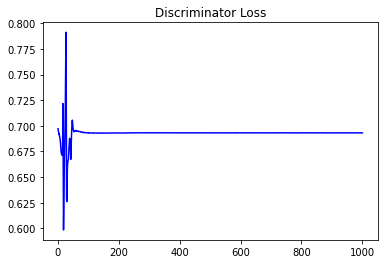

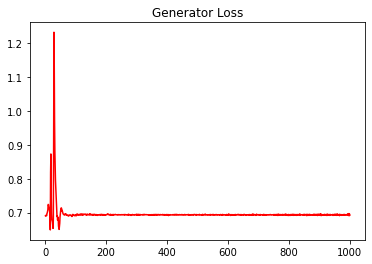

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.17635817491986738


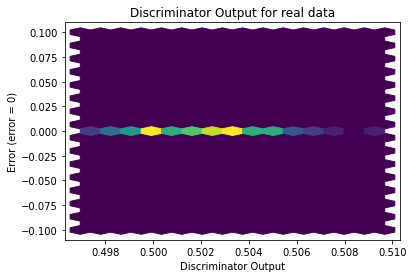

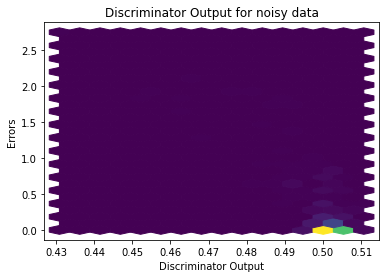

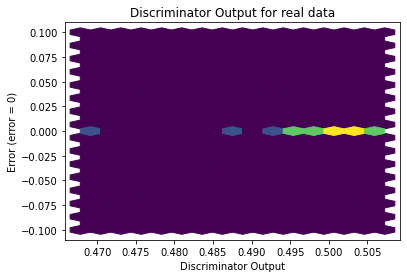

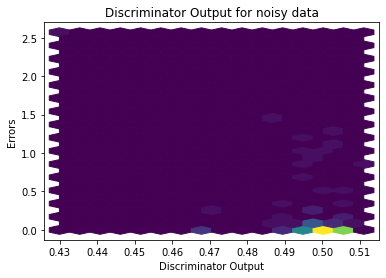

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


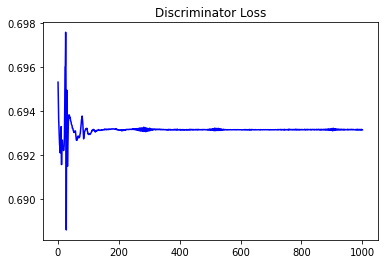

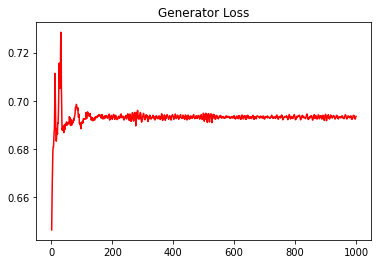

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.20383648680720604


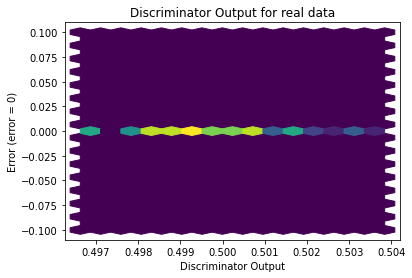

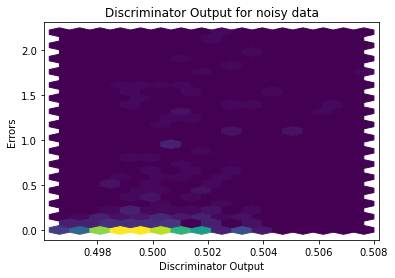

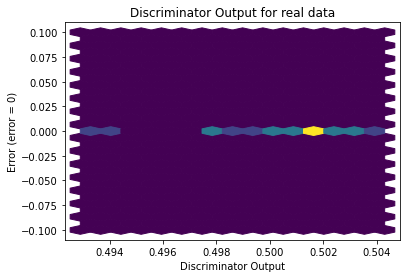

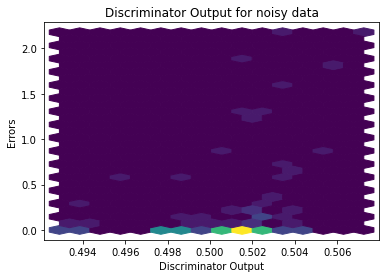

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0931]], requires_grad=True)
